In [2]:
!pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

 Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
 All rights reserved.

 Copyright (c) 2011-2023, Open source contributors.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contribut

# serie 1

## facili

Caricamento e visualizzazione dei dati:
Carica il file CSV in un DataFrame Pandas.
Mostra le prime 10 righe del DataFrame.

In [198]:
import pandas as pd

df = pd.read_csv('Walmart\Walmart_Sales.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Statistiche descrittive:
Calcola la media, la mediana e la deviazione standard della colonna Weekly_Sales.

In [199]:
import numpy as np

print(df.describe())

# se li voglio calcolare
column = df['Weekly_Sales']
a = np.array(column)
print(np.mean(a))
print(np.median(a))
print(np.std(a))

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


Filtri base:
Filtra il DataFrame per trovare tutte le righe in cui Holiday_Flag è uguale a 1.

In [200]:
col = df[df['Holiday_Flag']==1]
col

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424


Date parsing:
Trasforma la colonna Date in un formato datetime utilizzabile, quindi aggiungi una colonna Year estratta dalla data.


In [201]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [202]:
df['Year'] = df['Date'].dt.year

In [203]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
dtype: object

Valori univoci:
Trova il numero di store unici (Store) nel dataset.

In [204]:
tmp = df['Store']
print(len(tmp.unique()))

45


## media

Gruppi e aggregazioni:
Calcola la somma totale di Weekly_Sales per ciascun store (Store).

In [205]:
somma = df.groupby(df['Store'])['Weekly_Sales'].sum()
print(somma)

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


Filtri avanzati:
Trova tutte le settimane in cui le vendite (Weekly_Sales) sono superiori alla media delle vendite.

In [206]:
print(df[df['Weekly_Sales']>np.mean(df['Weekly_Sales'])]['Date'])

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6337   2010-12-17
6338   2010-12-24
6386   2011-11-25
6389   2011-12-16
6390   2011-12-23
Name: Date, Length: 2876, dtype: datetime64[ns]


Colonne calcolate:
Aggiungi una colonna Adjusted_Sales calcolata come Weekly_Sales moltiplicata per il CPI (Consumer Price Index).

In [42]:
df['Adjusted_Sales'] = df['Weekly_Sales']*df['CPI']

Grafico delle vendite per store:
Usa Matplotlib per creare un grafico a linee che mostri l'andamento di Weekly_Sales per un particolare store nel tempo.

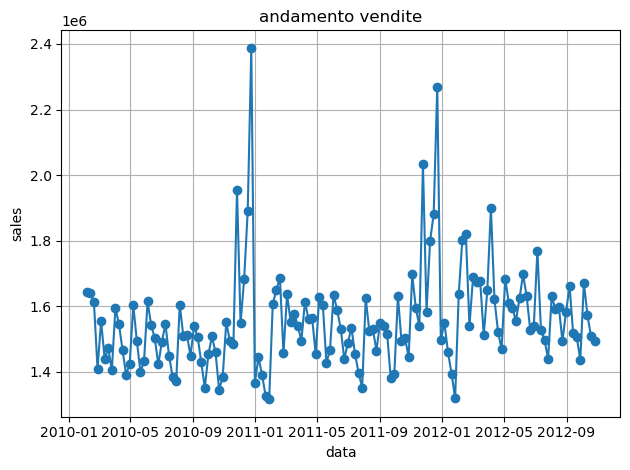

In [207]:
import matplotlib.pyplot as plt

idx = 1

data = df[df['Store']==idx]
plt.plot(data['Date'], data['Weekly_Sales'], marker='o')
plt.title('andamento vendite')
plt.xlabel('data')
plt.ylabel('sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Confronto festivo:
Determina se le vendite medie nelle settimane festive (Holiday_Flag = 1) sono maggiori rispetto a quelle delle settimane non festive.

In [54]:
holySales = df[df['Holiday_Flag']==1]['Weekly_Sales'].mean()
nSales = df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()
print(holySales,nSales,holySales>nSales)

1122887.8923555557 1041256.3802088555 True


## hard

Analisi di correlazione:
Calcola la matrice di correlazione tra le colonne numeriche (Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment) e visualizzala con un heatmap di Seaborn.

In [56]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Adjusted_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,3.469772e+08
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,3.468507e+08
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,3.405914e+08
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2.979031e+08
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3.286086e+08
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,1.369391e+08
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,1.409484e+08
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,1.412575e+08
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,1.381177e+08


Text(0.5, 1.0, 'Correlation Heatmap')

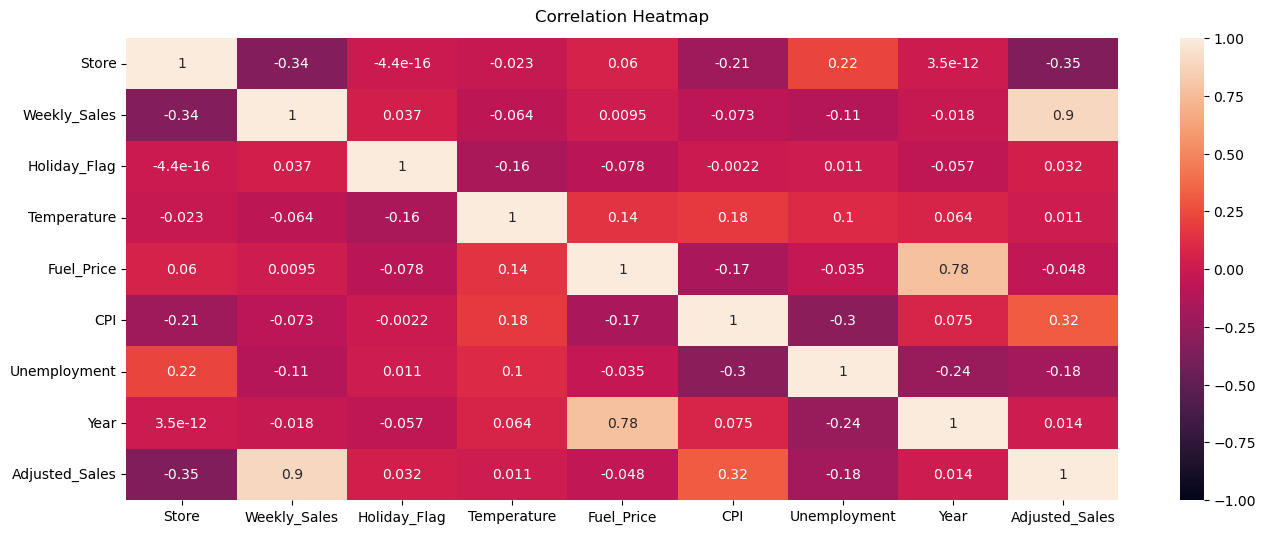

In [61]:
import seaborn as sns
plt.figure(figsize=(16, 6))

matCorr = df.select_dtypes('number').corr()
heatmap = sns.heatmap(matCorr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Trend stagionale:
Analizza i dati per identificare i trend stagionali: raggruppa le vendite medie per mese o trimestre e visualizzale con un grafico.

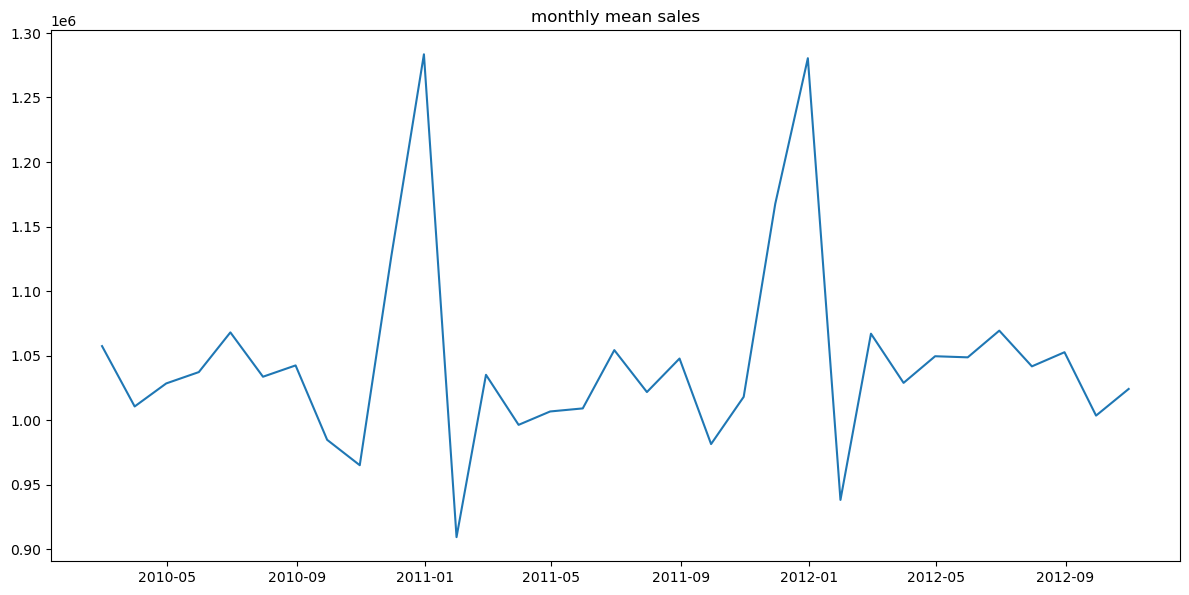

In [ ]:
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Weekly_Sales'].mean()  # 'M' is deprecated
plt.figure(figsize=(12,6))
plt.plot(monthly_sales)
plt.tight_layout()
plt.title('monthly mean sales')
plt.show()

Store con migliori performance:
Trova gli store con le 5 medie di Weekly_Sales più alte e rappresenta queste informazioni con un grafico a barre.

In [92]:
top5 = df.groupby('Store')['Weekly_Sales'].mean().nlargest(5)

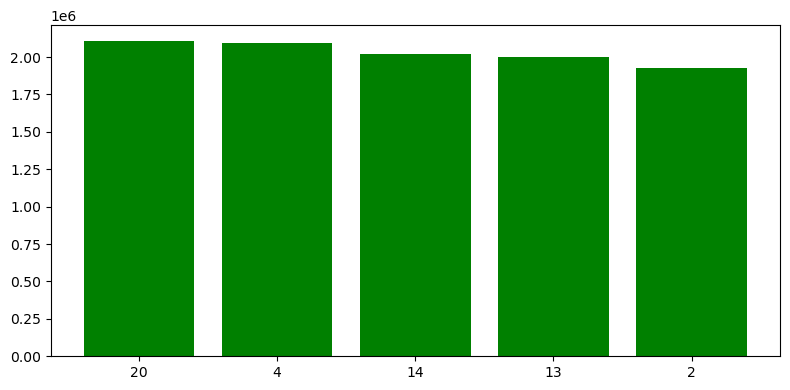

In [94]:
plt.figure(figsize=(8,4))
plt.bar(top5.index.astype('string'), top5.values, color='green')
plt.tight_layout()
plt.show()

Regressione lineare:
Usa una libreria come Scikit-learn per costruire un semplice modello di regressione lineare che predice Weekly_Sales usando Temperature, Fuel_Price, CPI e Unemployment.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']
xTrain,xTest,ytrain,ytest = train_test_split(X,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xTrain,ytrain)
print(model.score(xTest, ytest))  # R^2 score

0.017498572820902836


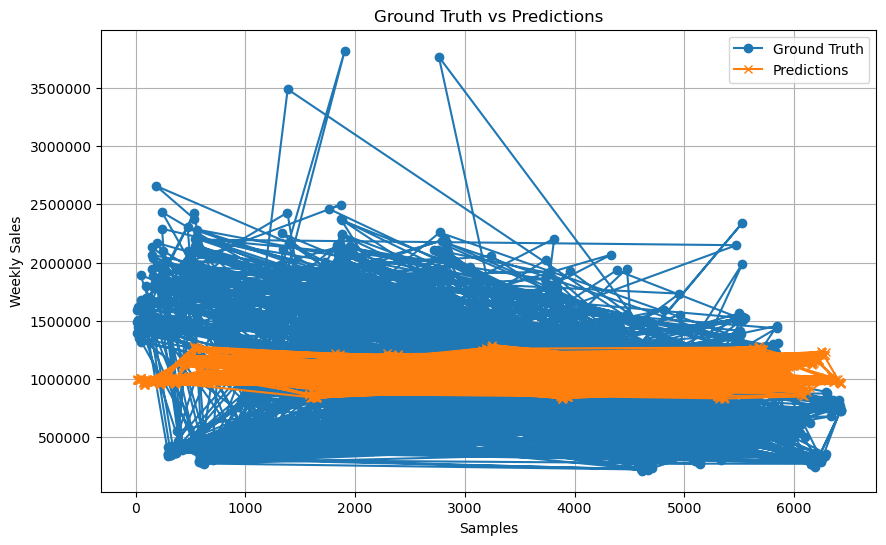

In [ ]:
preds = model.predict(xTest)
df = pd.DataFrame({'preds':preds, 'gt':ytest})
plt.figure(figsize=(10, 6))
plt.plot(df['gt'], label='Ground Truth', marker='o')
plt.plot(df['preds'], label='Predictions', marker='x')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.title('Ground Truth vs Predictions')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

Rilevamento dei valori anomali:
Identifica le settimane con vendite eccezionalmente alte o basse (oltre 2 deviazioni standard dalla media) e visualizzale.


In [122]:
mean_sales = df['Weekly_Sales'].mean()
std_sales = df['Weekly_Sales'].std()

# Filtra i dati
outliers = df[(df['Weekly_Sales'] > mean_sales + 2 * std_sales) | (df['Weekly_Sales'] < mean_sales - 2 * std_sales)]

print(outliers)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
46        1  24-12-2010    2387950.20             0        52.33       2.886   
98        1  23-12-2011    2270188.99             0        47.96       3.112   
185       2  26-11-2010    2658725.29             1        62.98       2.735   
187       2  10-12-2010    2378726.55             0        45.50       2.843   
188       2  17-12-2010    2609166.75             0        47.55       2.869   
...     ...         ...           ...           ...          ...         ...   
5480     39  24-12-2010    2495489.25             0        58.86       2.886   
5528     39  25-11-2011    2338832.40             1        66.36       3.236   
5532     39  23-12-2011    2554482.84             0        54.62       3.112   
5766     41  24-12-2010    2225016.73             0        29.81       2.781   
5818     41  23-12-2011    2263722.68             0        25.59       3.173   

             CPI  Unemployment  
46    

# serie 2

## facili

Carica il CSV: Carica il file CSV in un DataFrame Pandas.

Visualizza le prime righe: Mostra le prime 5 righe del DataFrame.

Informazioni di base: Ottieni informazioni di base sul DataFrame (numero di righe, colonne, tipi di dati).

Statistiche descrittive: Calcola le statistiche descrittive (media, deviazione standard, minimo, massimo) per la colonna Weekly_Sales.

Filtra i dati: Filtra il DataFrame per visualizzare solo le righe dove Holiday_Flag è uguale a 1.

In [130]:
df = pd.read_csv('Walmart\Walmart_Sales.csv')
'''
print(df.head(5))
print(len(df))
print(len(df.columns))
print(df.dtypes)
'''
'''
sales = df['Weekly_Sales']
mean = sum(sales)/len(sales)
std = sales.std()
min = sales.min()
max = sales.max()
print(mean,std,min,max)
'''
holy = df[df['Holiday_Flag']==1]
print(holy)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1         1  12-02-2010    1641957.44             1        38.51       2.548   
31        1  10-09-2010    1507460.69             1        78.69       2.565   
42        1  26-11-2010    1955624.11             1        64.52       2.735   
47        1  31-12-2010    1367320.01             1        48.43       2.943   
53        1  11-02-2011    1649614.93             1        36.39       3.022   
...     ...         ...           ...           ...          ...         ...   
6375     45  09-09-2011     746129.56             1        71.48       3.738   
6386     45  25-11-2011    1170672.94             1        48.71       3.492   
6391     45  30-12-2011     869403.63             1        37.79       3.389   
6397     45  10-02-2012     803657.12             1        37.00       3.640   
6427     45  07-09-2012     766512.66             1        75.70       3.911   

             CPI  Unemployment  
1     

## media

Aggiungi una colonna: Aggiungi una nuova colonna Sales_per_Temperature che sia il rapporto tra Weekly_Sales e Temperature.

Raggruppa i dati: Raggruppa i dati per Store e calcola la media delle Weekly_Sales per ogni negozio.

Ordina i dati: Ordina il DataFrame in base alla colonna Weekly_Sales in ordine decrescente.

Rimuovi una colonna: Rimuovi la colonna Unemployment dal DataFrame.

Conteggio valori unici: Conta quanti valori unici ci sono nella colonna CPI.

In [137]:
df = pd.read_csv('Walmart\Walmart_Sales.csv')
df['Sales_per_Temperature'] = df['Weekly_Sales']/df['Temperature']
gruppo = df.groupby('Store')['Weekly_Sales'].mean()
print(gruppo.head(3))
tmp = df.sort_values(by=['Weekly_Sales'], ascending=False)
print(tmp.head(3))
less = df.drop('Unemployment', axis=1)
print(less.head(3))
print(len(df['CPI'].unique()))

Store
1    1.555264e+06
2    1.925751e+06
3    4.027044e+05
Name: Weekly_Sales, dtype: float64
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   
2763     20  24-12-2010    3766687.43             0        25.17       3.141   
1333     10  24-12-2010    3749057.69             0        57.06       3.236   

             CPI  Unemployment  Sales_per_Temperature  
1905  182.544590         8.724          124834.470415  
2763  204.637673         7.484          149649.878029  
1333  126.983581         9.003           65703.780056  
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   

          CPI  Sales_per_Temperature  
0  211.09635

## hard

Merge di DataFrame: Supponendo di avere un altro DataFrame con informazioni aggiuntive sui negozi, unisci i due DataFrame sulla colonna Store.

Pivot Table: Crea una tabella pivot che mostri la media delle Weekly_Sales per ogni Store e Holiday_Flag.

Gestione dei valori mancanti: Controlla se ci sono valori mancanti nel DataFrame e, se presenti, gestiscili (ad esempio, riempiendoli con la media della colonna).

Visualizzazione dati: Crea un grafico a linee che mostri l'andamento delle Weekly_Sales nel tempo.

Analisi correlazione: Calcola e visualizza la matrice di correlazione tra le colonne numeriche del DataFrame.

In [143]:
pvt = pd.pivot_table(df, values='Weekly_Sales', index=['Store', 'Holiday_Flag'], aggfunc='mean')
print(pvt.head(4))

                    Weekly_Sales
Store Holiday_Flag              
1     0             1.546957e+06
      1             1.665748e+06
2     0             1.914209e+06
      1             2.079267e+06


In [176]:
'''
print(df.isna().sum())
print(df.isna().sum().sum())
'''

for i in range(5):
    df.loc[i*1000,'Weekly_Sales'] = np.nan
print(df.isna().sum().sum())  # added 5 nan values

5
5


In [183]:
import math
mean = df['Weekly_Sales'].mean()

for idx,elem in enumerate(df['Weekly_Sales']):
    if math.isnan(elem):
        df.loc[idx,'Weekly_Sales']=mean
        
print(df.isna().sum().sum())

0


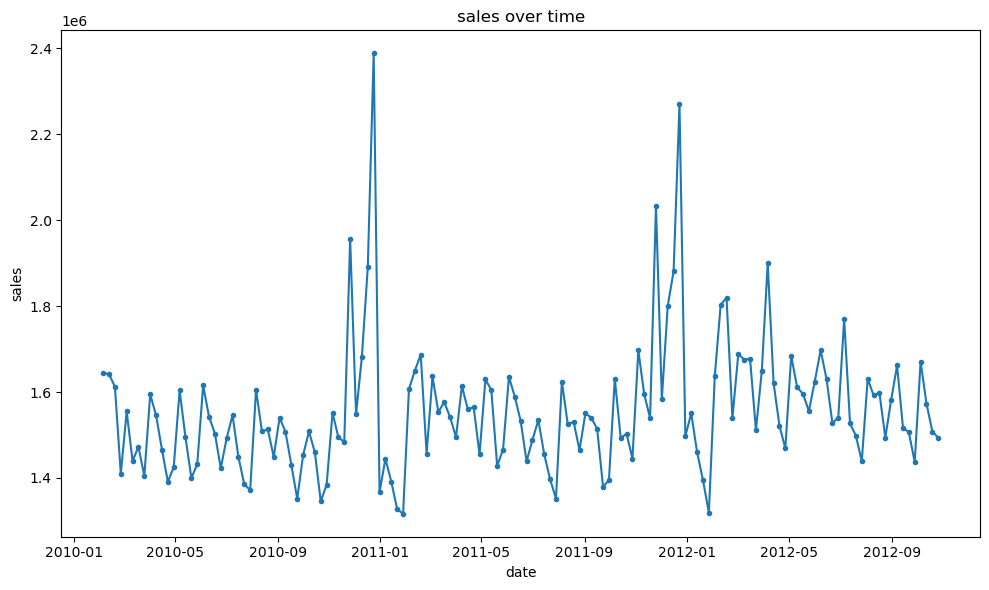

In [208]:
#Visualizzazione dati: Crea un grafico a linee che mostri l'andamento delle Weekly_Sales nel tempo.

data=df[df['Store']==1]
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Weekly_Sales'], marker='.')  # convert date to datetime for better visual!!!
plt.xlabel('date')
plt.ylabel('sales')
plt.title('sales over time')
plt.tight_layout()
plt.show()

<Axes: >

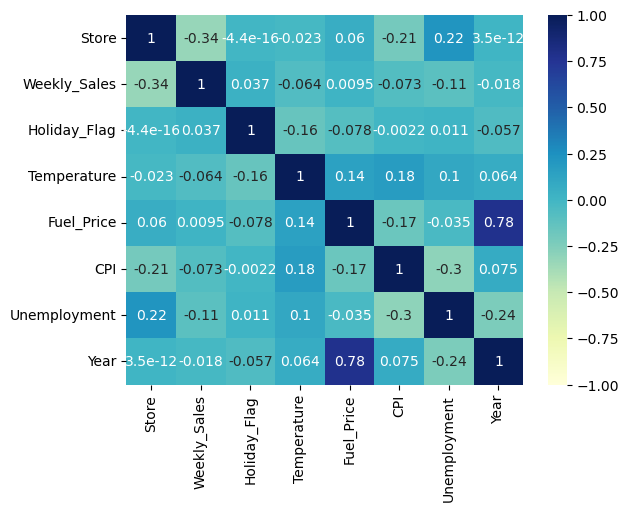

In [220]:
#Analisi correlazione: Calcola e visualizza la matrice di correlazione tra le colonne numeriche del DataFrame.

# get only numerical columns

nDf = df.select_dtypes([int,float])
sns.heatmap(nDf.corr(),vmin=-1,vmax=1,annot=True,cmap="YlGnBu")

In [222]:
df['Fuel_Price']

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
6430    3.997
6431    3.985
6432    4.000
6433    3.969
6434    3.882
Name: Fuel_Price, Length: 6435, dtype: float64

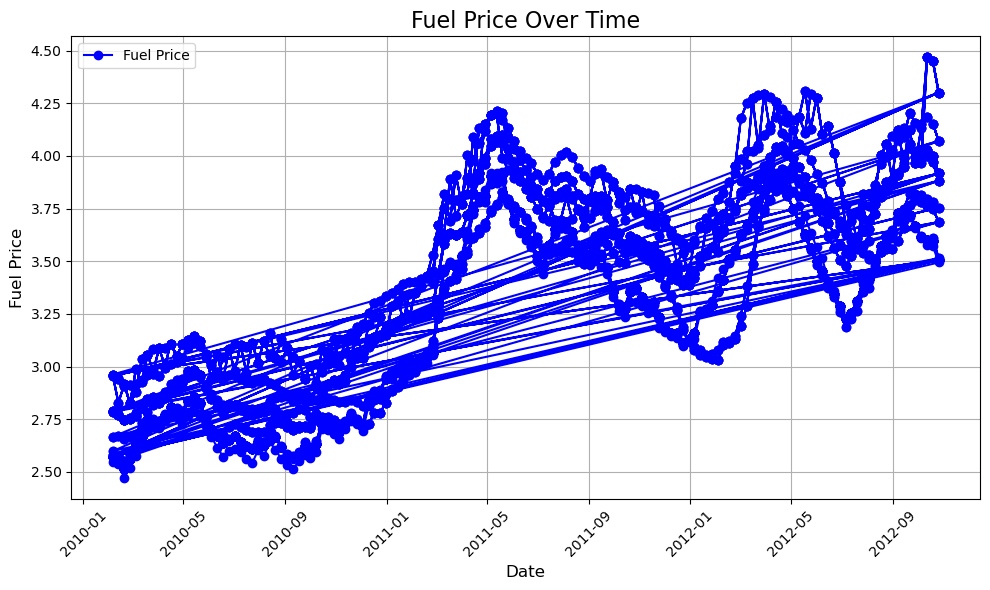

In [224]:
import matplotlib.pyplot as plt

# Crea il grafico a linee
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico
plt.plot(df['Date'], df['Fuel_Price'], marker='o', linestyle='-', color='b', label='Fuel Price')

# Aggiungi titoli e etichette
plt.title('Fuel Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fuel Price', fontsize=12)

# Formatta l'asse x per le date
plt.xticks(rotation=45)  # Ruota le etichette delle date per una migliore leggibilità

# Aggiungi una griglia e una legenda
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.tight_layout()  # Migliora il layout per evitare sovrapposizioni
plt.show()